# we open a csv for analysis

In [1]:
import pandas as pd
d = pd.read_csv("fortune500.csv")

In [2]:
d.head(2)

,Year,Rank,Company,Revenue (in millions),Profit (in millions)
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8


 > examine dtypes and find that profit is actually on object instead of expected float64

In [3]:
d.dtypes

Year                       int64
Rank                       int64
Company                   object
Revenue (in millions)    float64
Profit (in millions)      object
dtype: object

In [4]:
d.columns = ["year", "rank", "company", "revenue_mio", "profit_mio"]

In [5]:
d.head(1)

,year,rank,company,revenue_mio,profit_mio
0,1955,1,General Motors,9823.5,806


In [6]:
d.year

0        1955
1        1955
2        1955
3        1955
4        1955
         ... 
25495    2005
25496    2005
25497    2005
25498    2005
25499    2005
Name: year, Length: 25500, dtype: int64

In [7]:
d.profit_mio

0          806
1        584.8
2        195.4
3        212.6
4         19.1
         ...  
25495      493
25496    175.4
25497     57.8
25498     70.6
25499      584
Name: profit_mio, Length: 25500, dtype: object

> we need to identify those fields in the profit column, where the value is not a number

1. we use the regex r'[^0-9.-]' to find those values dont are not a number
2. d.loc[not_a_number] shows the rows which have such a field (in our case they are N.A.)

In [8]:
not_a_number = d.profit_mio.str.contains(r'[^0-9.-]')
d.loc[not_a_number]

,year,rank,company,revenue_mio,profit_mio
228,1955,229,Norton,135.0,N.A.
290,1955,291,Schlitz Brewing,100.0,N.A.
294,1955,295,Pacific Vegetable Oil,97.9,N.A.
296,1955,297,Liebmann Breweries,96.0,N.A.
352,1955,353,Minneapolis-Moline,77.4,N.A.
...,...,...,...,...,...
24242,2003,243,Farmland Industries,7580.2,N.A.
24296,2003,297,Land O'Lakes,5847.0,N.A.
24435,2003,436,Roundy's,3637.9,N.A.
24489,2003,490,Ace Hardware,3029.0,N.A.


> what is the percentage of "broken" data to "valid" data in percent?

In [9]:
len(d.profit_mio[not_a_number]) / len(d) * 100

1.4470588235294117

In [10]:
# add matplotlib features to jupyter
%matplotlib inline
import matplotlib.pyplot as plt


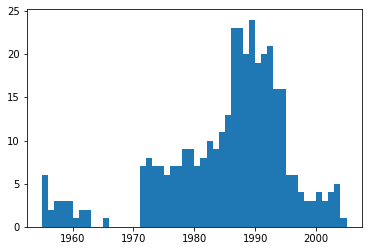

In [11]:
# we use matplotlib to plot an histogram of the broken data

x,y,z = plt.hist(d.year[not_a_number], bins=range(1955, 2006))

> see that missing values are on average 10-15 per year

> not more than 25 values are missing in a given year

In [12]:
# find all broken values or verify that all broken values are the same
# maybe some fields contains something else than "N.A."
set(d.profit_mio[not_a_number])

{'N.A.'}

To create the cleaned data we just assign a new data frame using a `not_a_number` like a filter

In [13]:
cleaned = d.loc[~not_a_number]

In [14]:
cleaned.head()

,year,rank,company,revenue_mio,profit_mio
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1


Though the field tpe of the data is still object and not float64:

In [15]:
cleaned.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio      object
dtype: object

In [16]:
# since pandas not supersmart, we tell it now:

# the new cleaned data gets profit_mio field overwritten, with the result of pd.to_numeric 
cleaned.profit_mio = cleaned.profit_mio.apply(pd.to_numeric)

/tmp/ipykernel_1853400/1249065690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.profit_mio = cleaned.profit_mio.apply(pd.to_numeric)


In [17]:
cleaned.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio     float64
dtype: object

In [18]:
len(d.profit_mio[not_a_number])

369

To check if the removed only the right values we can compare the length of the cleaned data with the original one

In [19]:
 len(d) - len(d.profit_mio[not_a_number]) == len(cleaned)

True

In [20]:
cleaned.dtypes

year             int64
rank             int64
company         object
revenue_mio    float64
profit_mio     float64
dtype: object

In [21]:
by_year = cleaned.loc[:, ['year', 'revenue_mio', 'profit_mio']].groupby('year')

In [29]:
by_year.mean()

,revenue_mio,profit_mio
year,,
1955,275.754453,16.732186
1956,323.604418,22.509237
1957,350.037626,23.181087
1958,377.977264,23.456740
1959,355.229376,19.279276
1960,395.231864,24.019439
1961,410.552410,23.340361
1962,419.556827,23.326104
1963,458.164200,26.965000


In [45]:
def plot(x, y, ax, y_label, color):
    ax.set_ylabel(y_label)
    ax.plot(x, y, color=color)
    ax.margins(.01, .01)

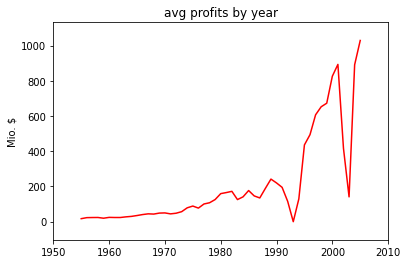

In [24]:
avgs = by_year.mean()

fig, ax = plt.subplots()
ax.set_title("avg profits by year")
plot(avgs.index, avgs.profit_mio, ax, "Mio. $", "red")

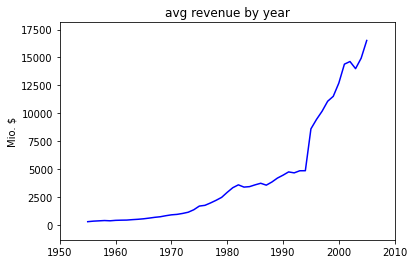

In [25]:
fig, ax = plt.subplots()
ax.set_title("avg revenue by year")
plot(avgs.index, avgs.revenue_mio, ax, "Mio. $", "blue")

In [26]:
import seaborn as sns

sns.set(style="darkgrid")

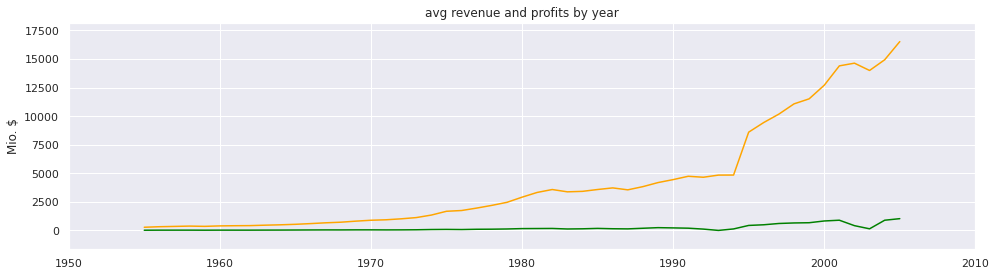

In [44]:
fig, ax  = plt.subplots()
ax.set_title("avg revenue and profits by year")
plot(avgs.index, avgs.profit_mio, ax, "Mio. $", "green")
plot(avgs.index, avgs.revenue_mio, ax, "Mio. $", "orange")

fig.set_size_inches(14, 4)
fig.tight_layout()

Now lets investigate standart deviation:

In [30]:
# lets define new plot function that can show it on the graph

def plot_with_std_dev(x, y, std_dev, ax, y_label, color):
    ax.fill_between(x, y - std_dev, y + std_dev, alpha=0.1)
    plot(x, y, ax, y_label, color)
    

Lets compute the standart deviations now:

In [35]:
std_profit = by_year.std().profit_mio


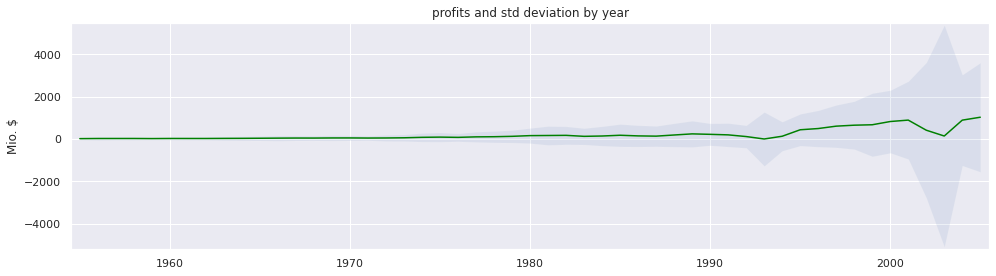

In [47]:
fig, ax  = plt.subplots()
ax.set_title("profits and std deviation by year")
plot_with_std_dev(avgs.index, avgs.profit_mio, std_profit, ax, "Mio. $", "green")

fig.set_size_inches(14, 4)
fig.tight_layout()

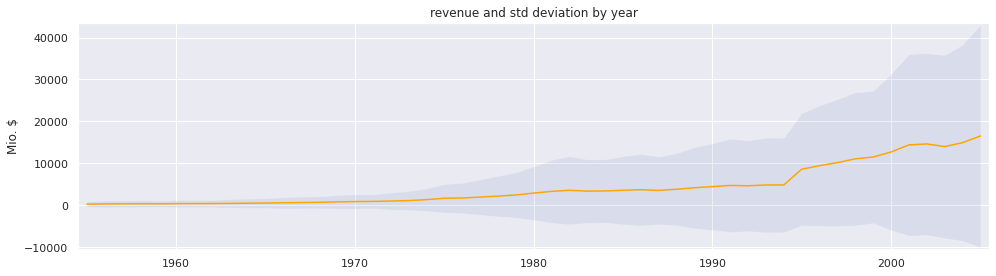

In [46]:
std_revenue = by_year.std().revenue_mio

fig, ax  = plt.subplots()
ax.set_title("revenue and std deviation by year")
plot_with_std_dev(avgs.index, avgs.revenue_mio, std_revenue, ax, "Mio. $", "orange")

fig.set_size_inches(14, 4)
fig.tight_layout()